# HOUSE PRICE PREDICTION

In [40]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/INTERNSHIP/BHARAT/MACHINE LEARNING/Assignment 1/USA_Housing.csv ")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  


In [4]:
# copying the data--
data.copy()
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
# data analysis--
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
print(data.dtypes)

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object


In [9]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
# checking the missing values--
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
data.shape

(5000, 7)

In [41]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# Exploratory Data Analysis

<Axes: >

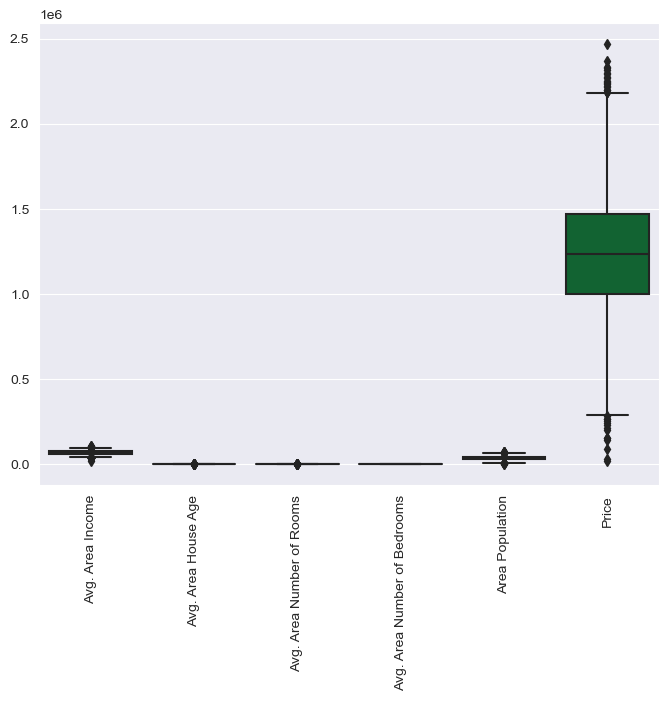

In [13]:
# checking the outliers--
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=data.loc[:, ['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms', 
                              'Avg. Area Number of Bedrooms','Area Population','Price']],palette="Greens")

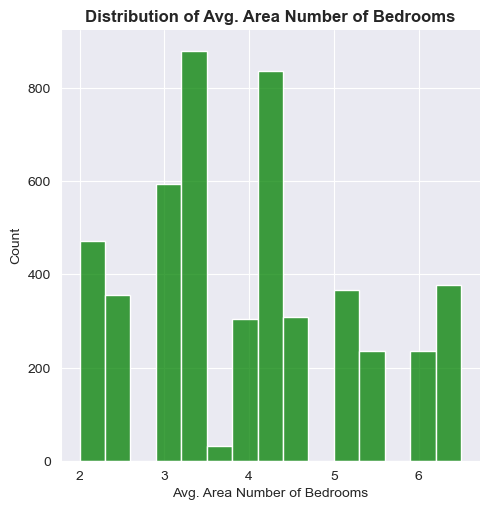

In [14]:
sns.displot(x=data["Avg. Area Number of Bedrooms"],bins=15,color="green")
data["Avg. Area Number of Bedrooms"].mean()
plt.title("Distribution of Avg. Area Number of Bedrooms",fontweight="bold")
plt.show()

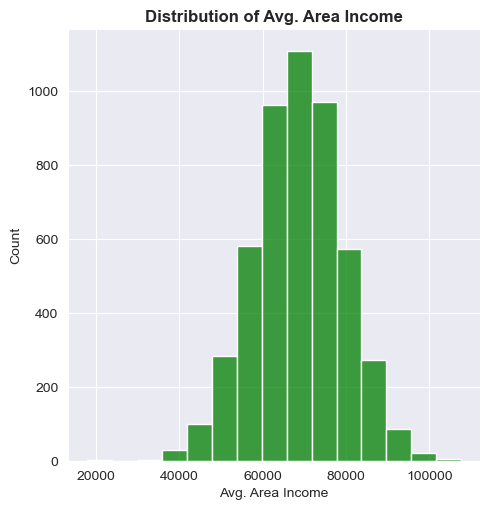

In [15]:
sns.displot(x=data["Avg. Area Income"],bins=15,color="green")
data["Avg. Area Income"].mean()
plt.title("Distribution of Avg. Area Income",fontweight="bold")
plt.show()

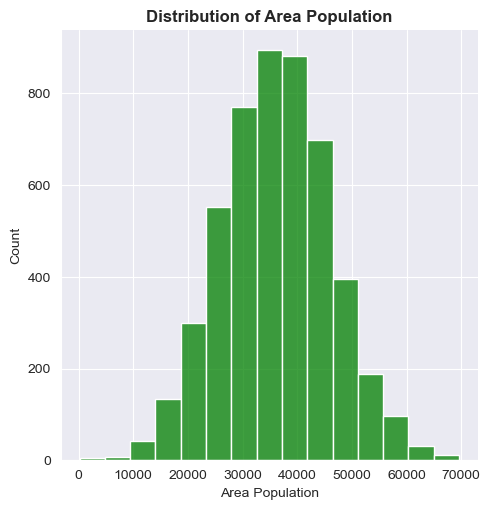

In [16]:
sns.displot(x=data["Area Population"],bins=15,color="green")
data["Area Population"].mean()
plt.title("Distribution of Area Population",fontweight="bold")
plt.show()

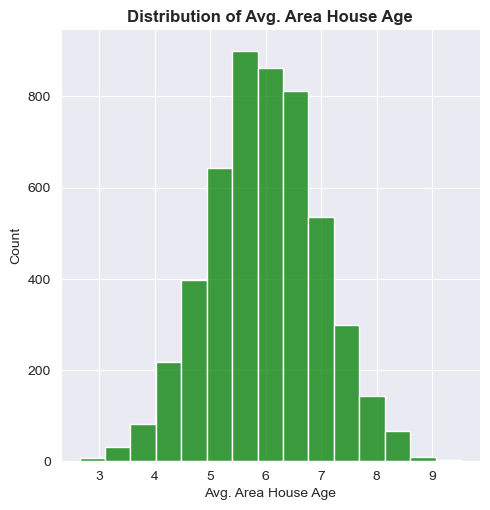

In [17]:
sns.displot(x=data["Avg. Area House Age"],bins=15,color="green")
data["Avg. Area House Age"].mean()
plt.title("Distribution of Avg. Area House Age",fontweight="bold")
plt.show()

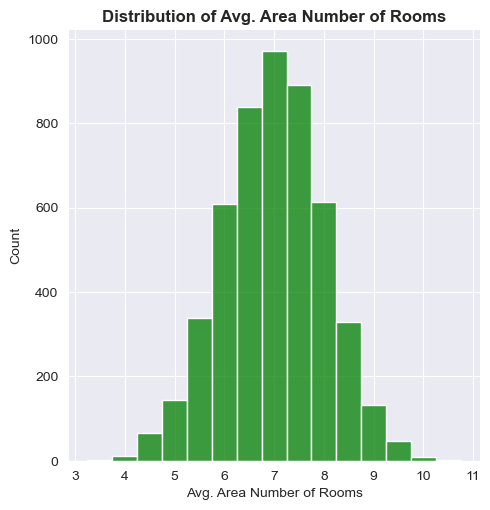

In [18]:
sns.displot(x=data["Avg. Area Number of Rooms"],bins=15,color="green")
data["Avg. Area Number of Rooms"].mean()
plt.title("Distribution of Avg. Area Number of Rooms",fontweight="bold")
plt.show()

<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

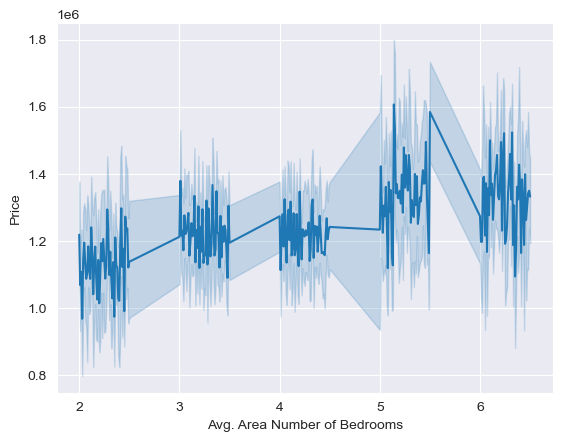

In [19]:
sns.lineplot(x=data["Avg. Area Number of Bedrooms"], y=data["Price"])

<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Price'>

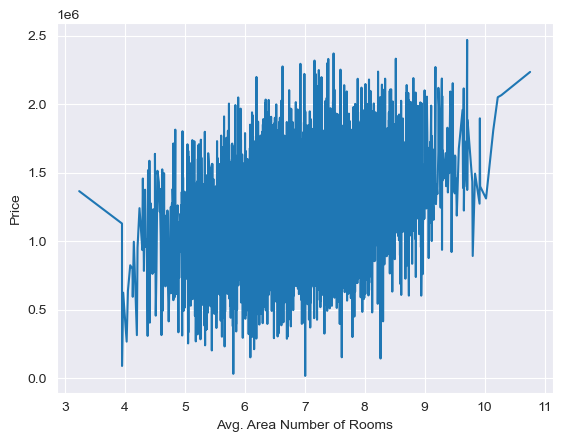

In [20]:
sns.lineplot(x=data["Avg. Area Number of Rooms"], y=data["Price"])

<Axes: xlabel='Price', ylabel='Density'>

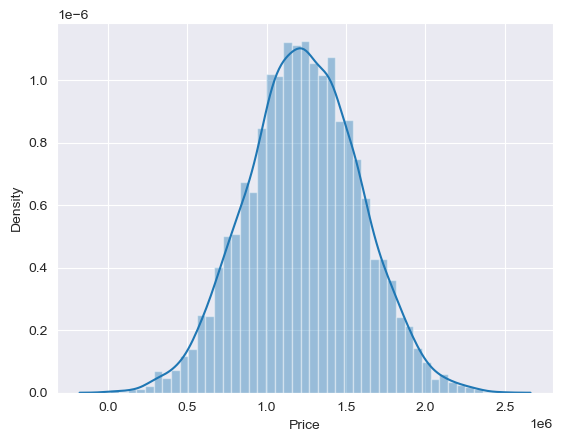

In [42]:
sns.distplot(data['Price'])

<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

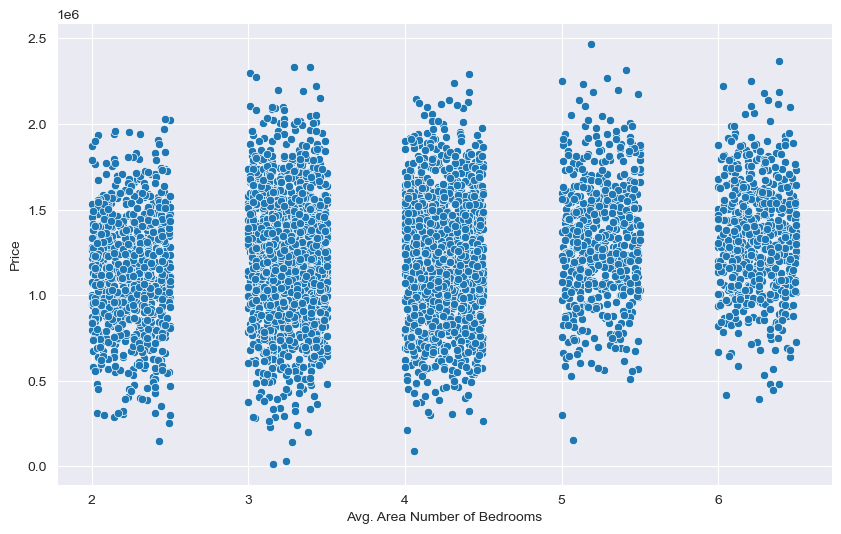

In [24]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = data['Avg. Area Number of Bedrooms'], y = data['Price'])

<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Price'>

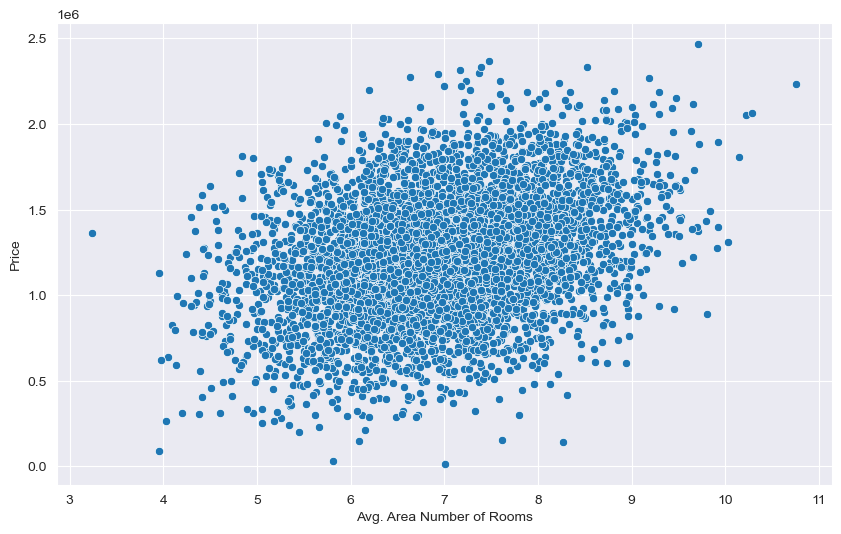

In [25]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = data['Avg. Area Number of Rooms'], y = data['Price'])

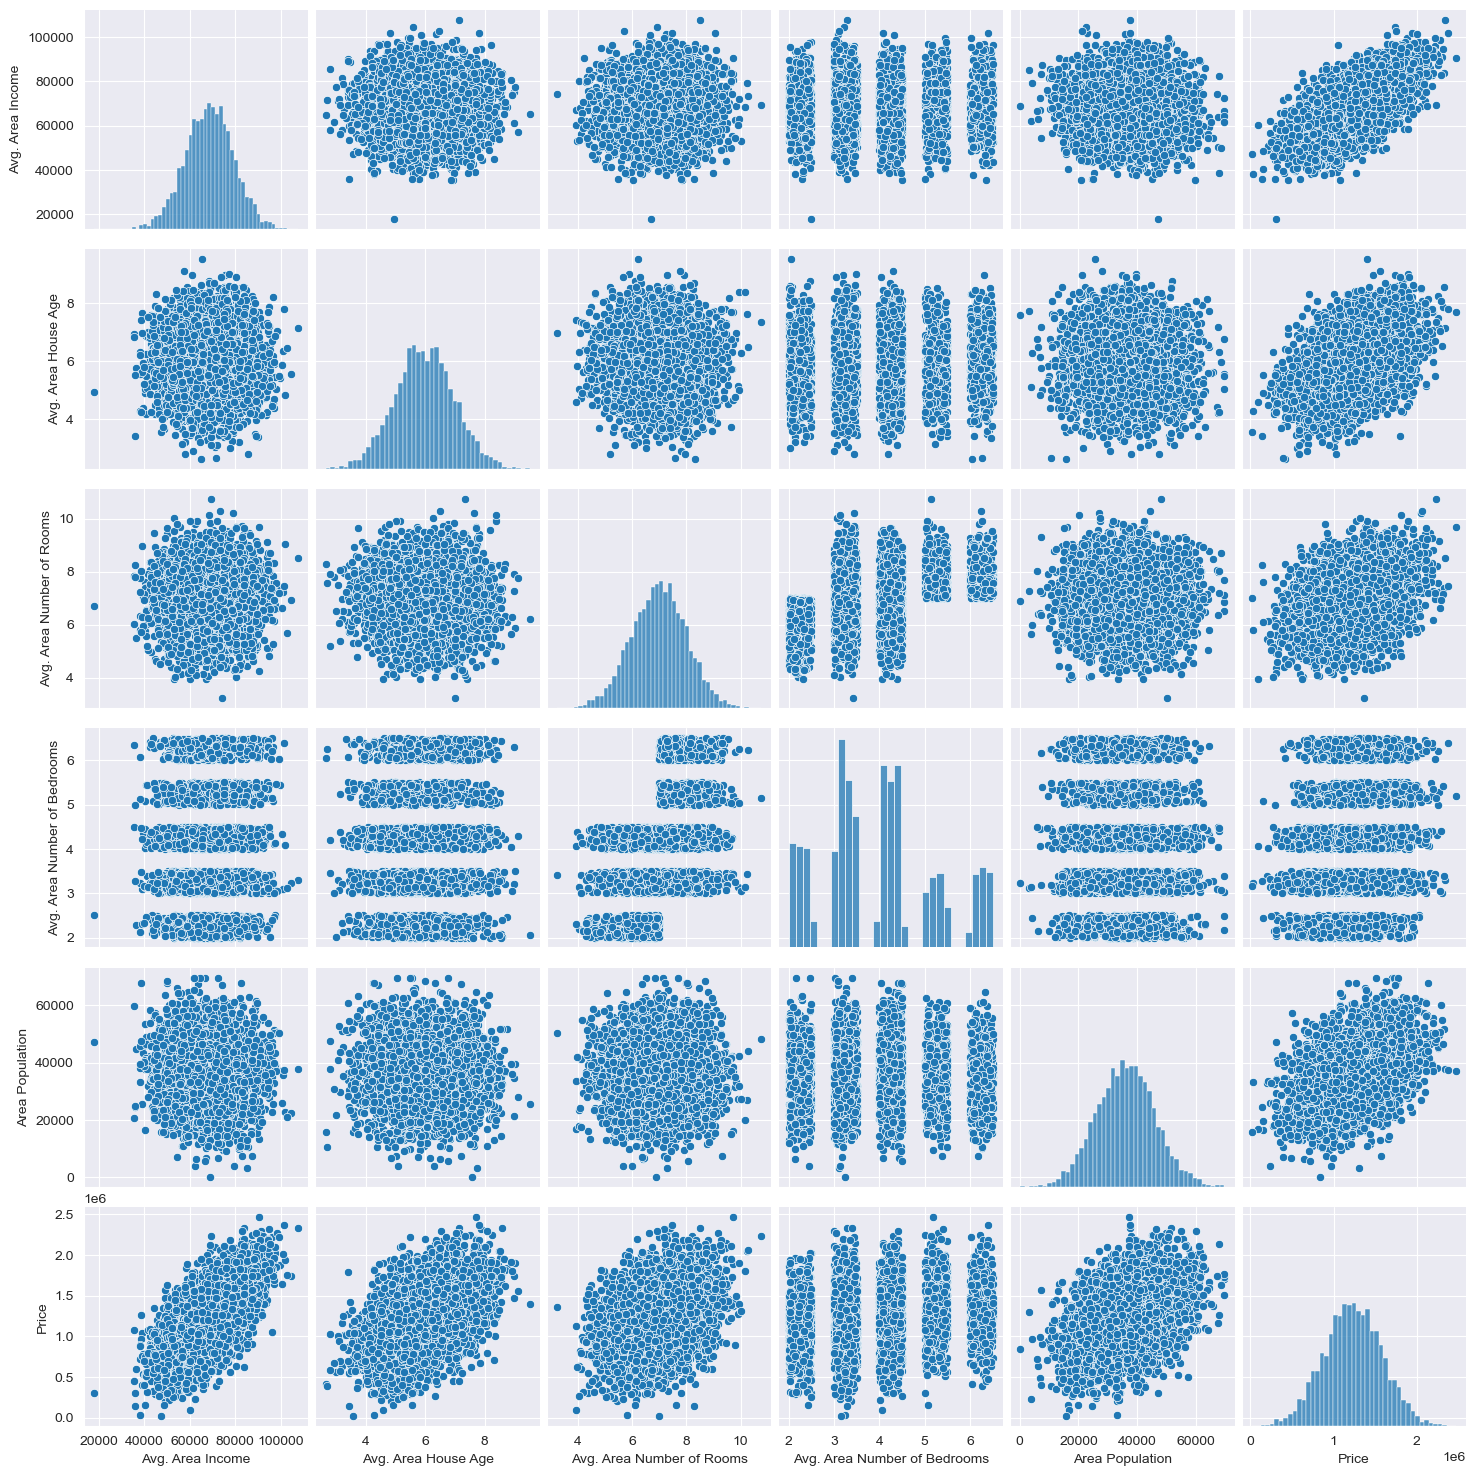

In [26]:
sns.pairplot(data)

<Axes: >

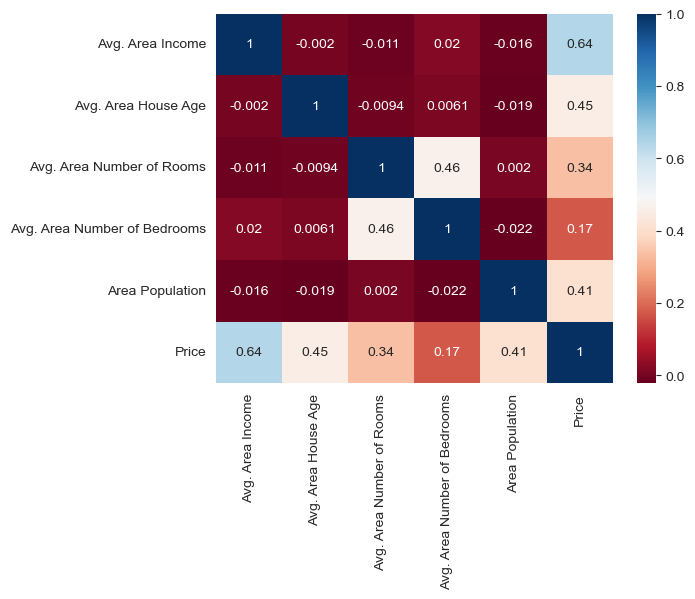

In [27]:
sns.heatmap(data [['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
                  'Area Population','Price']].corr(),annot=True,cmap="RdBu")

# Model Building

In [28]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 
          'Area Population']]

y = data['Price']

In [29]:
# sampling of data--
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return  X_train,X_test,y_train,y_test

In [30]:
# calling the train_test function--
X_train,X_test,y_train,y_test=train_test(X,y)

(4000, 5)
(4000,)
(1000, 5)
(1000,)


# Linear Regression

In [31]:
# defining--
def modelling(X_train,y_train,X_test):
    model=LinearRegression()
    model_train=model.fit(X_train,y_train)
    print("Model training is completed.")
    pred=model_train.predict(X_test)
    return pred

In [32]:
pred=modelling(X_train,y_train,X_test)
print(pred)

Model training is completed.
[1087989.69981558 1472798.50415297 1139665.37278054 1066044.21817677
 1387306.57004037 1113937.52713518 1512302.11310491 1897953.42540196
  980009.87482367 1175821.49355705 1270729.34977613 1267362.99165808
 1209705.76914325 1509174.61913691  722303.10444635 1860103.44269417
 1002599.87832515 1359575.55432331 1120186.06163274 1175880.66642041
 1494678.42939151 1019624.73899626 1557782.35195995 1186234.7631779
 1030628.5899258   744023.10060277  770285.41412342 1778603.81775962
  969830.41527389 1554861.94472563 1059232.51086633 1148385.25095857
 1187337.20682576 1023925.17573846 1802242.02622432 1114547.89643002
 1425686.28490096 1182062.23244309 1450181.29073171 1063971.88203234
  844362.99351512 1402968.63948604 1306892.41484021  923740.82374778
 1608911.41694218 1614910.78787025 1102557.83814917 1317447.47909154
 1074344.98699637  982626.76553686 1233994.23331892  885092.6527124
 1643324.88687238 1183362.12067301 1280280.49828918 1016439.1111741
 1046205

In [33]:
r2score=(round(r2_score(y_test,pred)*100,2))
print('r2score:',r2score)

r2score: 91.92


In [34]:
rmse = m.sqrt(mean_squared_error(y_test,pred))
print('RMSE:',rmse)

RMSE: 102273.09125631541


In [35]:
mae=mean_absolute_error(y_test,pred)
print('MAE:', mae)

MAE: 81920.75056405767


In [36]:
mse=mean_squared_error(y_test,pred)
print('MSE:', mse)

MSE: 10459785195.122622


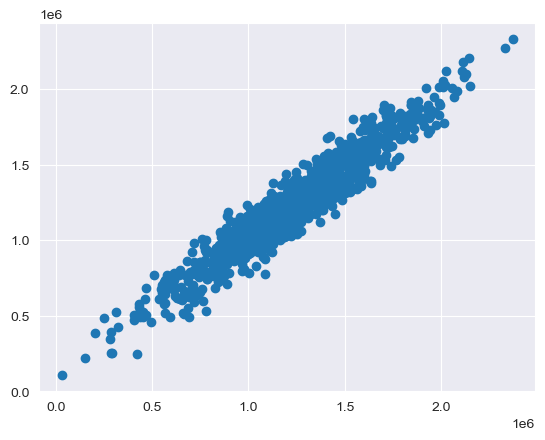

In [37]:
plt.scatter(y_test,pred)

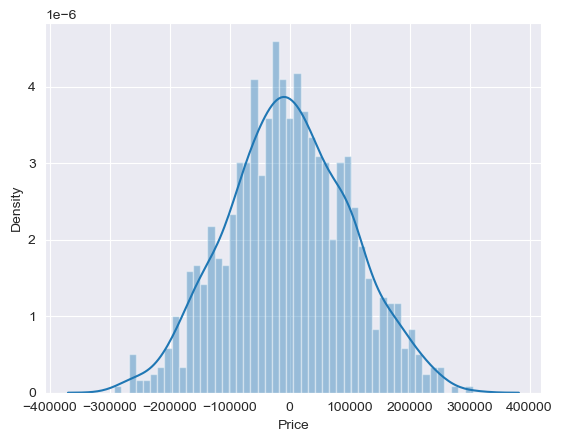

In [43]:
sns.distplot((y_test-pred),bins=50);

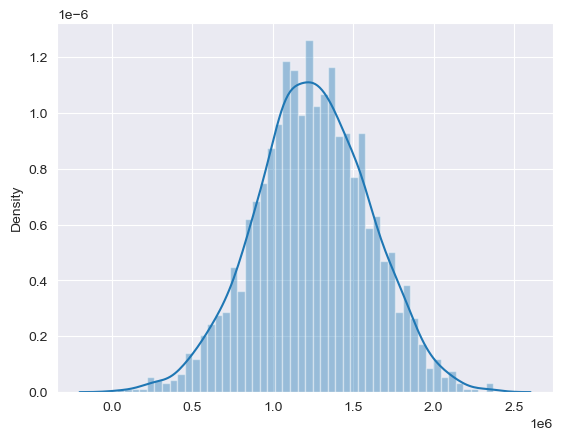

In [44]:
sns.distplot((y_test,pred),bins=50);